# Predicting Wine Quality

In [57]:
# Imports
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn import svm
import warnings
warnings.filterwarnings(action="ignore")

In [7]:
# Read data
data = pd.read_csv('winequality-red.csv', sep=';')

In [11]:
# Features
features = data.columns[::-1].values
print(features)

['quality' 'alcohol' 'sulphates' 'pH' 'density' 'total sulfur dioxide'
 'free sulfur dioxide' 'chlorides' 'residual sugar' 'citric acid'
 'volatile acidity' 'fixed acidity']


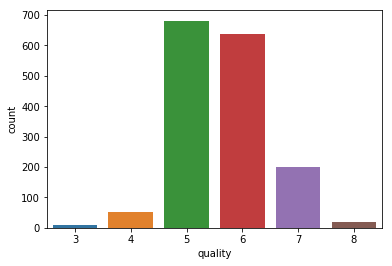

In [13]:
sns.countplot(x="quality", data=data)

In [14]:
# Checking if inputs and outputs have linear relationship.
# Pearson coeff helps in this case: > 0 => positive linear correlation, 0 => no correlation
# -1 => negative correlation
data.corr(method='pearson')
# From this table, it seems like alcohol, sulphates, citric acid have the most positive correlation.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [23]:
# Split inputs and outputs
X = data.iloc[:,0:-1]
y = data.iloc[:,-1]

In [33]:
# Normalizing data
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
y = y.values
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.33, random_state=42)

# Linear Regression

In [34]:
regression = LinearRegression().fit(X_train, y_train)

In [35]:
regression.coef_

array([ 0.03332856, -0.18773792, -0.03993332,  0.02597415, -0.08079873,
        0.03288781, -0.09882448, -0.03910117, -0.05042984,  0.13373027,
        0.30782102])

In [36]:
# Predict
y_pred = regression.predict(X_test)

In [42]:
r2_score(y_test, y_pred, multioutput='variance_weighted')

0.3594443107249067

In [44]:
mean_absolute_error(y_test, y_pred)

0.516334883098556

In [46]:
mean_squared_error(y_test, y_pred)

0.4242040899801838

# Lasso Regression

In [49]:
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [50]:
y_pred_lasso = clf.predict(X_test)

In [51]:
r2_score(y_test, y_pred_lasso, multioutput='variance_weighted')

0.28084689880601554

# SVM

In [58]:
clf_svm = svm.SVC(decision_function_shape='ovo')
clf_svm.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [59]:
y_pred_svm = clf_svm.predict(X_test)

In [60]:
r2_score(y_test, y_pred_svm, multioutput='variance_weighted')

0.29360913862303184